In [3]:
import numpy as np
import rasterio
from rasterio.plot import show
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from scipy.stats import linregress


from matplotlib import pyplot as plt # an interface to define how plot behaves / looks
plt.style.use('ggplot')
import seaborn as sns

### Raster Masking in Python to compare scatter plots of raster values
https://towardsdatascience.com/raster-data-scatter-plot-using-python-4bcdc8286769

In [4]:
import rasterio
import geopandas as gpd
from shapely.geometry import Point

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Open Rasters

In [5]:
# Open the temperature deviation raster
with rasterio.open('../data/heat/f_deviation_smooth_UTM18N_1ha.tiff') as src1:
    arr1 = src1.read(1)
    transform1 = src1.transform

# Open the tree density
with rasterio.open('../data/L1/tree_counts_per_ha.tiff') as src2:
    arr2 = src2.read(1)
    transform2 = src2.transform

# Open the canopy raster
with rasterio.open('../data/L1/crown_area_ha_masked.tif') as src3:
    arr3 = src3.read(1)
    transform3 = src3.transform
    
# Open canopy height model raster
with rasterio.open('../data/greenness/NY_CHM_10Int260m_ha.tif') as src4:
    arr4 = src4.read(1)
    transform4 = src4.transform

# Open carbon density raster
with rasterio.open('../data/greenness/NY_CHM529_CCset0_Carbondensity_ha.tif') as src5:
    arr5 = src5.read(1)
    transform5 = src5.transform
    
# Open scaled rent stabilized kernel density
with rasterio.open('../data/L1/KDE_RentStabilized_1ha_scaled_match.tiff') as src6:
    arr6 = src6.read(1)
    transform6 = src6.transform

    
# Open scaled subsidized kernel density
with rasterio.open('../data/L1/KDE_subsidized_1ha_scaled_match.tiff') as src7:
    arr7 = src7.read(1)
    transform7 = src7.transform
    
# Open all affordable kernel density
with rasterio.open('../data/L1/KDE_allaffordable_1ha_scaled_match.tiff') as src8:
    arr8 = src8.read(1)
    transform8 = src8.transform

In [6]:
# Get the size of the arrays
height, width = arr1.shape

# Initialize lists to store the data
coords = []
values1 = []
values2 = []
values3 = []
values4 = []
values5 = []
values6 = []
values7 = []
values8 = []

# Loop through each pixel in the arrays
for y in range(height):
    for x in range(width):
        # Convert pixel coordinates to map coordinates
        mx1, my1 = rasterio.transform.xy(transform1, y, x)

        # Get the raster values for each pixel
        value1 = arr1[y, x]
        value2 = arr2[y, x]
        value3 = arr3[y, x]
        value4 = arr4[y, x]
        value5 = arr5[y, x]
        value6 = arr6[y, x]
        value7 = arr7[y, x]
        value8 = arr8[y, x]
        
        # Append the data to the lists
        coords.append(Point(mx1, my1))
        values1.append(value1)
        values2.append(value2)
        values3.append(value3)
        values4.append(value4)
        values5.append(value5)
        values6.append(value6)
        values7.append(value7)
        values8.append(value8)



In [7]:
# -3.400000e+38 is a NaN - set anything outside of real data- range to NULL 
# replace -3.4e+38 values with NaN
a = np.array(values1)
# Heat anomolies are scaled from -8,8
values1 = np.where((a >= 8) | (a <= -8), np.nan, a).tolist()

# Tree Density (count per ha) 1 - 707
a = np.array(values2)
values2 = np.where((a > 707) | (a < 1), np.nan, a).tolist()

# Crown area 1,100 %
a = np.array(values3)
values3 = np.where((a > 100) | (a < 1), np.nan, a).tolist()

# canopy height model from 20dm to 600 dm
a = np.array(values4)
values4 = np.where((a > 600) | (a < 20), np.nan, a).tolist()

# Carbon density - Values: 0 - 410.1 ton/ha in floats
a = np.array(values5)
values5 = np.where((a > 410.1) | (a < 0), np.nan, a).tolist()

# rent stabilized housing density is scaled KDE (-1 1)
a = np.array(values6)
values6 = np.where((a > 1) | (a < -1), np.nan, a).tolist()

# subsidized housing density is scaled KDE (-1 1)
a = np.array(values7)
values7 = np.where((a > 1) | (a < -1), np.nan, a).tolist()

# affrordable housing density is scaled KDE (-1 1)
a = np.array(values8)
values8 = np.where((a > 1) | (a < -1), np.nan, a).tolist()


In [8]:
# Create a dataframe from the lists
data = {'geometry': coords, 
        'f_deviation': values1, 
        'tree_dens': values2,
        'canopy_cover': values3,
        'chm': values4,
        'cd': values5,
        'rentstab_dens': values6,
        'subsidized_dens': values7,
        'affordable_dens': values8
       }
df = pd.DataFrame(data)




In [9]:
(len(df) - len(df.dropna()))/len(df)

0.961647804931387

In [10]:
gdf = gpd.GeoDataFrame(df, crs=src1.crs)


(array([1098.,  818.,  768.,  862.,  924., 1024., 1052., 1163., 1279.,
        1427., 1635., 1757., 2304., 2784., 3478., 4012., 4477., 5056.,
        5424., 5374., 4710., 4176., 3614., 3186., 2515., 2074., 1251.,
         825.,  628.,  576.]),
 array([-7.99993515e+00, -7.46660687e+00, -6.93327859e+00, -6.39995031e+00,
        -5.86662203e+00, -5.33329376e+00, -4.79996548e+00, -4.26663720e+00,
        -3.73330892e+00, -3.19998064e+00, -2.66665236e+00, -2.13332408e+00,
        -1.59999580e+00, -1.06666752e+00, -5.33339246e-01, -1.09672546e-05,
         5.33317312e-01,  1.06664559e+00,  1.59997387e+00,  2.13330215e+00,
         2.66663043e+00,  3.19995871e+00,  3.73328698e+00,  4.26661526e+00,
         4.79994354e+00,  5.33327182e+00,  5.86660010e+00,  6.39992838e+00,
         6.93325666e+00,  7.46658494e+00,  7.99991322e+00]),
 <BarContainer object of 30 artists>)

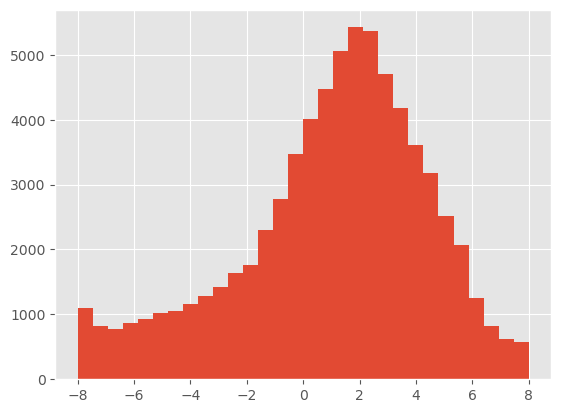

In [26]:
# histogram of assessed value per unit
plt.hist(gdf['f_deviation'], bins = 30)


(array([1.4352e+04, 1.5521e+04, 1.3601e+04, 9.9420e+03, 5.7960e+03,
        3.6310e+03, 2.1710e+03, 1.5170e+03, 1.1180e+03, 8.4900e+02,
        6.0500e+02, 5.1600e+02, 3.8100e+02, 3.5500e+02, 3.3400e+02,
        2.5400e+02, 2.2600e+02, 2.2800e+02, 1.8500e+02, 1.7200e+02,
        2.0700e+02, 1.6100e+02, 1.4900e+02, 1.0300e+02, 1.0800e+02,
        6.3000e+01, 4.2000e+01, 2.4000e+01, 1.2000e+01, 5.0000e+00]),
 array([  1.        ,  24.53333333,  48.06666667,  71.6       ,
         95.13333333, 118.66666667, 142.2       , 165.73333333,
        189.26666667, 212.8       , 236.33333333, 259.86666667,
        283.4       , 306.93333333, 330.46666667, 354.        ,
        377.53333333, 401.06666667, 424.6       , 448.13333333,
        471.66666667, 495.2       , 518.73333333, 542.26666667,
        565.8       , 589.33333333, 612.86666667, 636.4       ,
        659.93333333, 683.46666667, 707.        ]),
 <BarContainer object of 30 artists>)

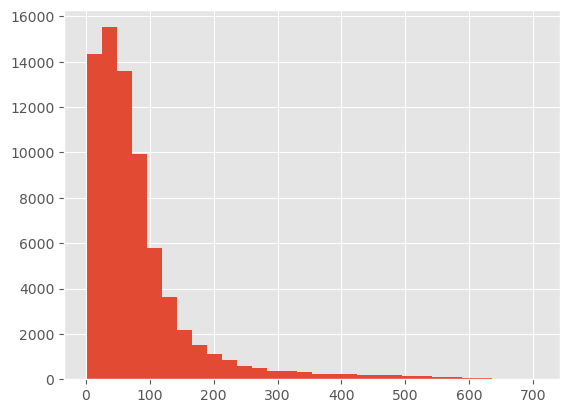

In [27]:
plt.hist(gdf['tree_dens'], bins = 30)


Text(0.75, 0.85, 'R-squared: 0.1424')

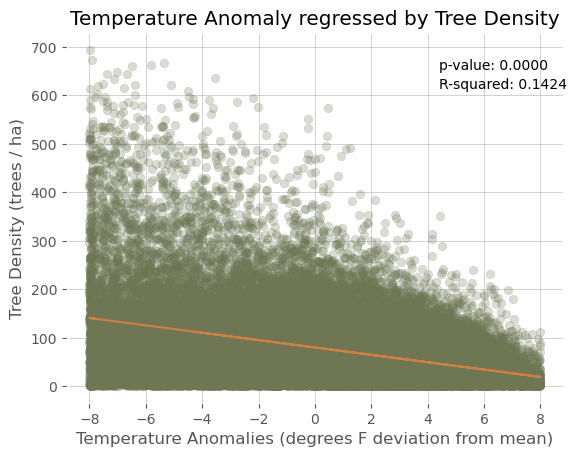

In [28]:
# Subset desireable variables, dropping NaNs
s = gdf[['f_deviation', 'tree_dens']].dropna()
x = s['f_deviation']
y = s['tree_dens']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)

# Scatter plots
plt.scatter(x,y, color=(110/255, 118/255, 84/255), alpha = 0.25)
plt.plot(x, regression_line, color=(204/255, 128/255, 68/255))
plt.gca().set_facecolor('none')
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xlabel('Temperature Anomalies (degrees F deviation from mean)')
plt.ylabel('Tree Density (trees / ha)')
plt.title('Temperature Anomaly regressed by Tree Density')
# Add p-value and R-squared to the plot
plt.text(0.75, 0.9, f'p-value: {p_value:.4f}', transform=plt.gca().transAxes)
plt.text(0.75, 0.85, f'R-squared: {r_value**2:.4f}', transform=plt.gca().transAxes)


## Canopy Coverage vs Temp Anomaly

p-value: 0.0000
R-squared: 0.1560


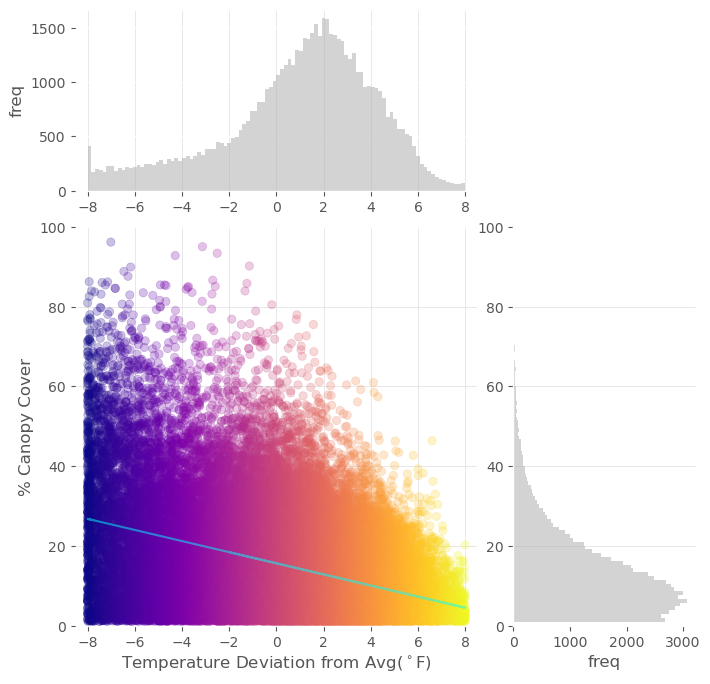

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Subset desireable variables, dropping NaNs
s = gdf[['f_deviation', 'canopy_cover']].dropna()
x = s['f_deviation']
y = s['canopy_cover']
z = s['f_deviation']
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

# Set Axis Lims
ax_main.set_xlim(xmin = -8.5, xmax=8.5)
ax_main.set_ylim(ymin = 0, ymax = 100)
    
# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='aqua', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Temperature Deviation from Avg($^\circ$F)", ylabel="% Canopy Cover")
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(3, 80, f'p-value: {p_value:.4f}')
#ax_main.text(3, 75, f'R-squared: {r_value**2:.4f}')


ax_xDist.hist(x,bins=100,align='mid', alpha = 0.5, color = 'darkgrey')
ax_xDist.set(ylabel='freq')
ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')

ax_xDist.set_facecolor('none')
# Set Axis Lims
ax_xDist.set_xlim(xmin = -8.5, xmax=8.5)
ax_yDist.set_ylim(ymin = 0, ymax = 100)


ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color = 'darkgrey', alpha = 0.50)
ax_yDist.set(xlabel='freq')
ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')

ax_yDist.set_facecolor('none')

print(f'p-value: {p_value:.4f}')
print(f'R-squared: {r_value**2:.4f}')
plt.savefig('../figs/canopycover_vs_tempanomaly_pixellevel.png', dpi = 300, bbox_inches = 'tight')

## Subsidized Housing vs. Canopy Cover

In [12]:
gdf.columns

Index(['geometry', 'f_deviation', 'tree_dens', 'canopy_cover', 'chm', 'cd',
       'rentstab_dens', 'subsidized_dens', 'affordable_dens'],
      dtype='object')

P-value: 3.919295214409751e-18
R-squared: -0.03314627265567742


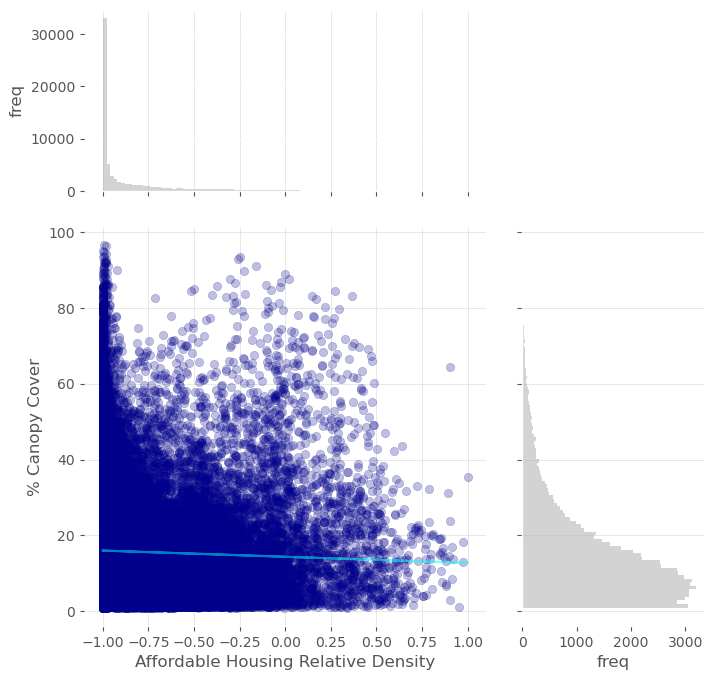

In [50]:
# Subset desireable variables, dropping NaNs
s = gdf[['affordable_dens', 'canopy_cover']].dropna()

x = s['affordable_dens']
y = s['canopy_cover']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


# Turn off tick labels on marginals
plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)
# Scatter

ax_main.scatter(x,y, color = 'darkblue',alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='aqua', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Affordable Housing Relative Density", ylabel="% Canopy Cover")
ax_main.set_facecolor('none')
# Add p-value and R-squared to the plot
#ax_main.text(1.25, 80, f'p-value: {p_value:.4f}')
#ax_main.text(1.25, 75, f'R-squared: {r_value**2:.4f}')

ax_xDist.hist(x,bins=100,align='mid', alpha = 0.5, color = 'darkgrey')
ax_xDist.set(ylabel='freq')
ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')

ax_xDist.set_facecolor('none')


ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color = 'darkgrey', alpha = 0.50)
ax_yDist.set(xlabel='freq')
ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')

ax_yDist.set_facecolor('none')

print('P-value:', str(p_value))
print('R-squared:', str(r_value))

plt.savefig('../figs/canopycover_vs_affordablehousingdensity.png')

P-value: 4.927977592305861e-19
R-squared: 0.0341931456028884


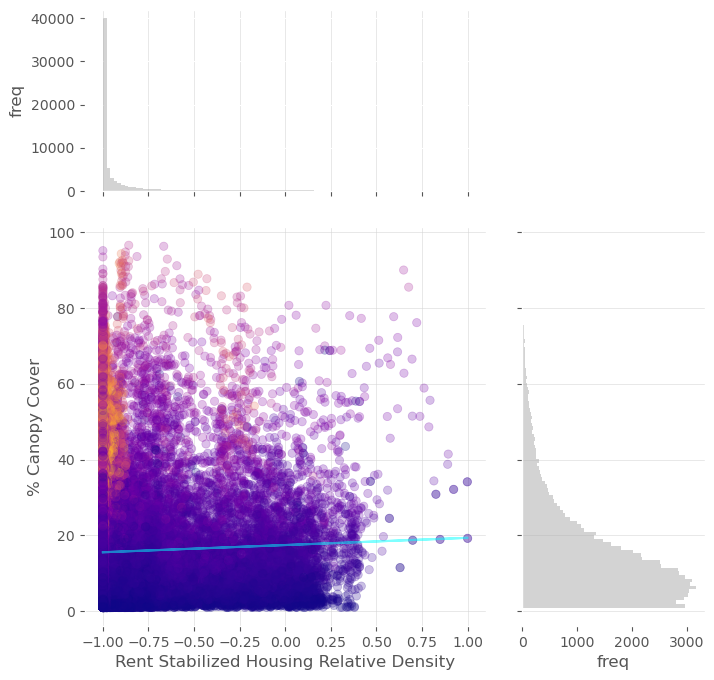

In [39]:
# Subset desireable variables, dropping NaNs
s = gdf[['subsidized_dens', 'canopy_cover', 'tree_dens']].dropna()

x = s['subsidized_dens']
y = s['canopy_cover']
z = s['tree_dens']
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
# Turn off tick labels on marginals
plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)
# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='aqua', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Rent Stabilized Housing Relative Density", ylabel="% Canopy Cover")
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(1.25, 80, f'p-value: {p_value:.4f}')
#ax_main.text(1.25, 75, f'R-squared: {r_value**2:.4f}')

# Set up marginal histograms
ax_xDist.hist(x,bins=100,align='mid', alpha = 0.5, color = 'darkgrey')
ax_xDist.set(ylabel='freq')
ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')
ax_xDist.set_facecolor('none')

# y marginal
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color = 'darkgrey', alpha = 0.50)
ax_yDist.set(xlabel='freq')
ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')
ax_yDist.set_facecolor('none')

print('P-value:', str(p_value))
print('R-squared:', str(r_value))


plt.savefig('../figs/canopycover_vs_subsidizedhousingdensity.png')

In [ ]:
x = gdf['tree_dens']
y = gdf['rentstab_kde']
z = gdf['tree_dens']
# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regression_line = np.polyval([slope, intercept], x)


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
# Scatter

ax_main.scatter(x,y, c = z, cmap = "plasma",alpha = 0.25)

# Regression
ax_main.plot(x, regression_line, color='aqua', alpha = 0.5)

# Plot aes
ax_main.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major')
ax_main.set(xlabel="Tree Density", ylabel="Rent Stabilized Housing Density")
ax_main.set_facecolor('none')

# Add p-value and R-squared to the plot
#ax_main.text(1.25, 80, f'p-value: {p_value:.4f}')
#ax_main.text(1.25, 75, f'R-squared: {r_value**2:.4f}')


ax_xDist.hist(x,bins=100,align='mid', alpha = 0.5, color = 'darkgrey')
ax_xDist.set(ylabel='freq')
ax_xDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'x')

ax_xDist.set_facecolor('none')


ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color = 'darkgrey', alpha = 0.50)
ax_yDist.set(xlabel='freq')
ax_yDist.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.75, which = 'major', axis = 'y')

ax_yDist.set_facecolor('none')

plt.savefig('../figs/tree_density_vs_RentStabilizedDens.png')
